In [1]:
# This cell is tagged for removal

import math as maths

import numpy as np

import aliases

from everest.window import Canvas, DataChannel as Channel

### Simple isoviscous rheology

Due to their relative simplicity and amenability to symbolic analysis, isoviscous models were among the earliest published mantle convection models {cite}`McKenzie1973-gt,McKenzie1974-wb,Jarvis1986-me,Blankenbach1989-li`, and they continue to be produced and discussed today {cite}`Zhong2005-lh,Weller2016-cc,Weller2016-nm,Vilella2018-il`.

In an isoviscous model, the viscosity function (usually set to $\eta=1$) is constant throughout space and time. Though simple, it is nevertheless able to reproduce appropriate surface velocities, gravitational profiles, and even topographic wavelengths {cite}`McKenzie1973-gt,McKenzie1974-wb`. Though its parameters are few, there remain limitless possible variations through *Rayleigh* number, internal heat $H$, domain geometry, and choice of boundary condition - many of which boast long-term stability solutions with enough implicit nonlinearity to make purely analytical studies infeasible {cite}`Daly1980-xl`. Even within each parameter set, chaotic dynamics ensure that two nearly identical configurations may yet have wildly divergent outcomes {cite}`Stewart1989-os,Palymskiy2003-fq`. And while the isoviscous model is certainly the most computationally tractable of all mantle-like rheologies, it is only in the last decade that long-run simulations of appropriate scale for the Earth ($\mathrm{Ra}>10^7$) have become possible {cite}`Vynnycky2013-wg,Trubitsyn2018-jo`; these have confirmed earlier intuitions that stable convective planforms may not exist, or at least may never manifest on planetary spatiotemporal scales {cite}`Huttig2011-jt`.

Although the isoviscous model does bely considerable complexity, it is simple enough to make some solutions analytically attainable. Like all convecting systems, a 'critical' *Rayleigh* number $\mathrm{Ra}_{\mathrm{cr}}$ should exist below which convection ceases and conduction dominates (i.e. $\mathrm{Nu}=1$), defining a 'supercritical $\mathrm{Ra}$':

$$ R \equiv \frac{\mathrm{Ra}}{\mathrm{Ra}_{\mathrm{cr}}} $$

What occurs at any given value of $R$ is determined by the availability of a certain 'critical' wavelength of thermal perturbation. A thermal perturbation at the critical wavelength is guaranteed to grow faster than any other perturbation at any other wavelength - but there is no guarantee that even a critical perturbation such as this will grow fast enough to overcome the conductive geotherm and establish convection. At $R<1$, the conductive timescale is always quicker than the convective timescale, even for a critical perturbation. At values of $R>1$, there is always at least one perturbation wavelength that is fast enough to outstrip conduction and establish a convective geotherm. Increasing $R$ beyond $1$ makes more wavelengths available for convective growth, until at extreme values ($\mathrm{Ra} >> 10^7$) even artificial heterogeneities introduced by random noise can grow, such that large-scale models become overwhelmingly time-dependent {cite}`Jarvis1984-xo`. Between these sub- and super-critical scenarios lies the point $R=1$, where the growth timescale of a critical perturbation is comparable to the conductive timescale, and the two thermal mechanisms are in perpetual contention.

Remarkably, the value of the critical wavelength $\mathrm{Ra}_{\mathrm{cr}}$ is independent of the thermal properties of the system and, for the sorts of plane box geometries under discussion here, should theoretically be exactly $\sqrt{2}$ {cite}`Chandrasekhar1961-ez`. Whether that wavelength is actually *available* is another question. A domain whose aspect ratio $A$ is smaller than $\sqrt{2}$ is forced to make do with perturbations of a maximum wavelength of $A$. The effect of this is to create a dependency of $\mathrm{Ra}_{\mathrm{cr}}$ on $A$ such that {cite}`Malkus1954-ee`:

$$ \mathrm{Ra}_{\mathrm{cr}} = \min_{x > 0} \frac{\pi^4 \left( 1 + A^2 \right)^3}{A^4} $$

At any value of $A$ greater than the 'global' critical wavelength of $\sqrt{2}$, we find that the critical *Rayleigh* number should come to:

$$ \mathrm{Ra}_{\mathrm{cr}} = \frac{27\pi^4}{4} \approx 657.5 $$

By comparison, at the unit aspect ratios typically modelled ($A=1$), the value of $\mathrm{Ra}_{\mathrm{cr}}$ lies instead at ({cite}`Grover1968-wa`):

$$ \mathrm{Ra}_{\mathrm{cr}} = 2^3\pi^4 \approx 779.3 $$

A value which is borne out in laboratory testing {cite}`Whitehead2011-gs`.

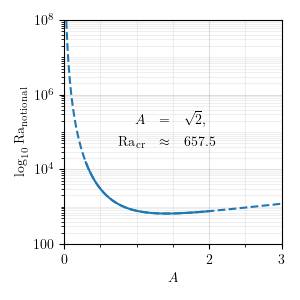

In [10]:
#| label: nu_ra_scaling

canvas = Canvas(size=(3, 3))
ax = canvas.make_ax()

crit_func = lambda A: maths.pi**4 * (1 + A**2)**3 / A**4

xchan = Channel(
    tuple(val / 100 for val in range(30, 201)),
    label='$A$',
    )
ychan = Channel(
    tuple(map(crit_func, xchan.data)),
    label=r'$\mathrm{Ra}_{\mathrm{notional}}$',
    log=True,
    )

ax.line(
    xchan, ychan,
    color='tab:blue',
    )

dashed_xchan = Channel(
    tuple(val / 100 for val in range(1, 301)),
    capped=(False, True)
    )
dashed_ychan = Channel(
    tuple(map(crit_func, dashed_xchan.data)),
    log=True,
    lims=(None, 10**8),
    )
ax.line(
    dashed_xchan, dashed_ychan,
    linestyle='--',
    color='tab:blue'
    )

ymin = np.min(ychan.data)
xmin = xchan.data[np.where(ychan.data == np.min(ychan.data))[0][0]]

ax.annotate(
    xmin, ymin,
    ''.join((
        r"\begin{eqnarray*}",
        r"A &=& \sqrt{2},\\",
        (r"\mathrm{Ra}_\mathrm{cr} &\approx&"+str(round(10**ymin, 1))),
        r"\end{eqnarray*}",
        )),
    points=(0, 60),
    )

# ax.props.title.text = r"\beta = \frac{1}{3}"
ax.props.title.visible = True

canvas

```{figure} #nu_ra_scaling
:name: nu_ra_scaling_fig

The global minimum of the curve of aspect ratio to 'notional' *Rayleigh* number gives the 'critical' *Rayleigh* number below which convection yields to conduction.
```

While heat may be transported by convection in the interior of the system, heat may only cross in or out of the system as a whole via conduction. This occurs across two thin layers at the outer and inner boundaries. Since we stipulate that these layers are purely conductive, a *Rayleigh* number defined only across each layer must be below the critical value for that layer: ${\mathrm{Ra}}_{layer} < {{\mathrm{Ra}}_{layer}}_{\mathrm{cr}}$ `Olson1987-do`. This is the first observation of boundary layer theory, whence can be deduced the following fundamental power law relationship between the *Rayleigh* and *Nusselt* numbers {cite}`Schubert2001-ea`:

$$ \mathrm{Nu} \propto \mathrm{Ra}^{\beta}, \quad \beta \to \frac{1}{3} $$

Where $\mathrm{Nu}$ is the Nusselt number. The coefficient of proportionality is theoretically $\approx 0.1941$ {cite}`Olson1987-do`, though it has been argued that its value will tend to be dominated by uncertainty in practice {cite}`Lenardic2003-wd`; reported values have ranged between $0.25-0.27$ {cite}`Olson1987-do,Jarvis1989-qj`.

An equivalent scaling {cite}`Jarvis1982-ua` has instead:

$$ \mathrm{Nu} \propto R^{\beta} $$

Where $R$, again, is the proportion by which $\mathrm{Ra}$ exceeds $\mathrm{Ra}_{\mathrm{cr}}$.

Defining $\mathrm{Ra}$ in this way preserves the value of $\beta$ insofar as $\mathrm{Ra}^{\mathrm{cr}}$ is independent of it, but allows the coefficient of proportionality to relate more strictly to non-thermal factors like the domain geometry - for example the aspect ratio, which (above a certain threshold) has been observed to stretch or compress the planform horizontally without changing the underlying boundary stability criteria {cite}`Jarvis1982-ua`.

Another neat implication of the $\beta$ law is that $ \mathrm{Nu} \to 1 $ as $ R \to 1 $. This is intuitive because $ \mathrm{Nu} \to 1 $ when convection collapses, which is just what is implied by $ R \to 1 $. However, we do have to be careful when considering subcritical values of $\mathrm{Ra}$, which - if the $\beta$ scaling is taken literally - would drive $\mathrm{Nu}$ to values below one: a sub-conductive geotherm. While a scenario like this could conceivably obtain over the short term - potentially even as a consequence of abrupt convective failure, as the scaling law suggests - it could not persist over the long term due to the relatively rapid rate of thermal diffusion relative to planetary timescales. Thus it is arguably inappropriate for a steady-state scaling law to project $\mathrm{Nu} < 1$ in any scenario whatsoever. A branching function is implied where $\mathrm{Nu}$ tracks the conductive geotherm in subcritical conditions.

$$
\mathrm{Nu} =
\begin{cases} 
R^{\beta}, & R > 1 \\
1 &
\end{cases} \quad k \ge 1
$$

A conditional definition like this implies a piecewise function. If the relation is in fact continuous, as would be natural, the behaviour at the limit $R \to 1$ is unclear. In practice, as we have discussed, the fate of any convecting system near this boundary will be heavily controlled by the particular distribution of hot and cold material at any given time.

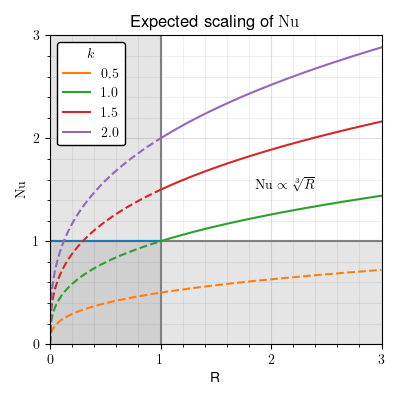

In [9]:
#| label: beta_k_nu_scaling

# from matplotlib import colors as _mcolors

canvas = Canvas(size=(4, 4))
ax = canvas.ax(density=1.2)

ax.ax.axvline(1, color='grey')
ax.ax.axhline(1, color='grey')

coll = ax.line(
    xchan := Channel(
        np.linspace(0, 1, 100), label='R', capped=(True, True)
        ),
    Channel(
        xchan.data**0, lims=(0, 3), label=r'$ \mathrm{Nu} $', capped=(True, True)
        ),
    # color='black',
    # color='tab:blue',
    )

kvals = (0.5, 1., 1.5, 2.)
mplines = []

for i, kval in enumerate(kvals):

    mpline = ax.line(
        xchan := Channel(np.linspace(1, 3, 200)),
        Channel(kval * xchan.data**(1/3)),
        )[0]

    mplines.append(mpline)

    ax.line(
        xchan := Channel(np.linspace(0, 1, 100)),
        Channel(kval * xchan.data**(1/3)),
        color=mpline.get_color(),
        linestyle='--',
        )

# ax.line(
#     xchan := Channel(np.linspace(0, 1, 100), label='R', capped=(True, True)),
#     Channel(xchan.data**(1/3)),
#     linestyle='--',
#     color='tab:blue',
#     )



ax.annotate(
    2., 1.4,
    r"$ \mathrm{Nu} \propto \sqrt[3]{R} $",
    )

ax.mplax.fill_between(
    (0, 3), 0, 1, facecolor='grey', alpha=0.2
    )
ax.mplax.fill_betweenx(
    (0, 3), 0, 1, facecolor='grey', alpha=0.2
    )

ax.props.legend.set_handles_labels(
    mplines,
    map(r"${}$".format, map(str, kvals)),
    )

mplines[0].set_linestyle('--')

ax.props.legend.title.text = '$k$'
ax.props.legend.title.visible = True
ax.props.legend.frame.colour = 'black'
ax.props.legend.frame.visible = True

ax.props.title.text = f"Expected scaling of {r'$\mathrm{Nu}$'}"
ax.props.title.visible = True

canvas

```{figure} #beta_k_nu_scaling
:name: beta_k_nu_scaling_fig

The $\beta$ scaling for varying values of the proportionality constant $k$. When either $R$ or $\mathrm{Nu}$ fall below one, a conductive geotherm is implied.
```

In the state where $\mathrm{Nu}$ satisfies the $\beta$ law, the interior of each cell becomes a homogeneous region of uniform temperature $T^{cell}$ and variable but low velocities, with strong gradients and shears at the margins, and overall cell dimensions approaching an aspect ratio of $\sqrt{2}$. Because of the fixed temperature scale, the only way heat transport can be enhanced in such a system is by thinning the boundary layers, which in practice occurs by dripping/pluming until only the theoretical stable boundary thickness is left. For this reason, $\mathrm{Nu}$ also functions as a useful proxy for boundary layer thickness when this is otherwise hard to define.

The canonical $\beta$ scaling is seductive because it connects the relatively well-constrained fact of surface geothermal flux with the more mysterious thermal state of the mantle, and so allows parameterised thermal histories to be projected through deep time. The $\beta \to \frac{1}{3}$ limit itself ultimately derives from the *Rayleigh* number's dependence on length cubed, and while there is no *a priori* reason to believe that this analytical justification must be borne out in practice, it has been recognised as highly suggestive for over half a century {cite}`Chan1971-xv`. Testing this scaling behaviour empirically was an early priority of computational geodynamics, with several studies producing estimates that converged on, but did not achieve, the theoretical $\frac{1}{3}$ scaling: the value has been reported as any of $0.313$ {cite}`Jarvis1982-ua`, $0.318$ {cite}`Jarvis1986-me`, $0.319$ {cite}`Schubert1985-sy`, $0.326$ {cite}`Jarvis1989-qj`, $0.36$ {cite}`Quareni1985-ff`, and $0.31$ {cite}`Niemela2000-cu`, using various methods both numerical and laboratory-based. The reason for the deviation is uncertain. One possibility is that the boundary layer instability theory is only valid in the limit $\mathrm{Ra}\to\infty$ {cite}`Olson1987-do`. Alternatively, high $\mathrm{Ra}$ values may witness transitions to alternate scaling logics altogether - perhaps lowering $\beta$. It has even been suggested that, at very high *Rayleigh* numbers, an 'asymptotic regime' of $\beta \to \frac{1}{2}$ might emerge, though this has yet to be observed in practice {cite}`Niemela2000-cu`.

While the $\beta$ scaling strictly holds only for those isoviscous systems with purely basal (no volumetric) heating, Cartesian geometry, and free-slip boundaries, it has been found to hold for a wide range of systems if certain corrections are made {cite}`Schubert2001-ea`.